<a href="https://colab.research.google.com/github/Siddhi-S-Thakur/EDA-RealEstate/blob/main/ElectricScooterEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso


## 0. Load Data into dataframe

In [2]:
df = pd.read_csv("/content/scooter_battery_dataset.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 1. NUll values

### Mean Median Mode

In [3]:
total = df.isna().sum()
print(total/df.shape[0]*100)

RideDistance_km        0.0
AvgSpeed_kmh           0.0
Temperature_C          0.0
RiderWeight_kg         0.0
BatteryDrop_Percent    0.0
dtype: float64


## 3.Duplicates

In [5]:
df.shape

(900, 5)

In [7]:
df.drop_duplicates().shape

(900, 5)

In [ ]:
plt

## Outlier IQR Q1, Q2, Q3

Lower = Q1-1.5*IQR
Upper = Q3+1.5*IQR

### Z-score
####(x - mean)/ sd
#### range from -3 to 3

<function matplotlib.pyplot.show(close=None, block=None)>

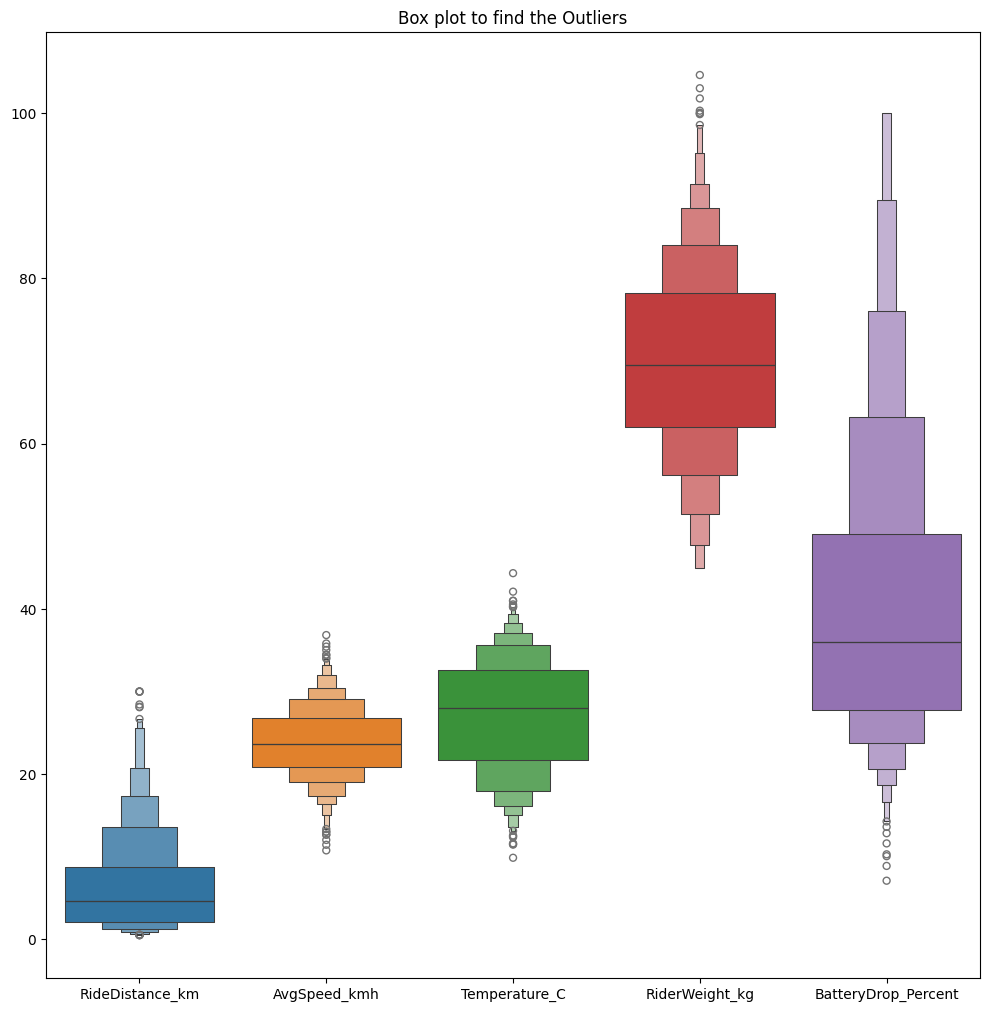

In [8]:
plt.figure(figsize=(10,10))
sns.boxenplot(df)
plt.tight_layout()
plt.title("Box plot to find the Outliers")
plt.show

## Skewness
### log1p
### sqrt
### zscore

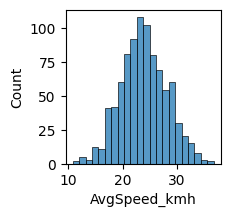

In [9]:
plt.figure(figsize=(2,2))
sns.histplot(df["AvgSpeed_kmh"])
plt.show()

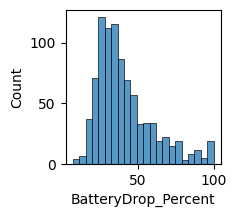

In [10]:
plt.figure(figsize=(2,2))
sns.histplot(df["BatteryDrop_Percent"])
plt.show()

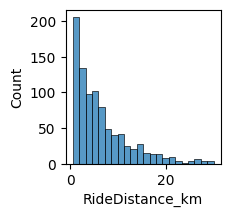

In [11]:
plt.figure(figsize=(2,2))
sns.histplot(df["RideDistance_km"])
plt.show()

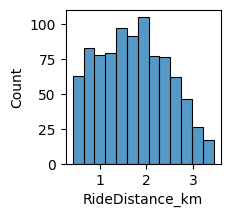

In [12]:
plt.figure(figsize=(2,2))
sns.histplot(np.log1p(df["RideDistance_km"]))
plt.show()

In [14]:
def remove_outliers_iqr(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  return lower,upper



(np.float64(-7.964259055000003), np.float64(18.801809463000005))

In [20]:
print("Before:",df.shape)

for col in df.columns:
  low,up = remove_outliers_iqr(df,col)
  print(col,remove_outliers_iqr(df,col))
  df = df[(df[col] >= low) & (df[col] <= up)]

print("After:",df.shape)

Before: (840, 5)
RideDistance_km (np.float64(-6.679121813250001), np.float64(16.27968226675))
AvgSpeed_kmh (np.float64(12.327369027499996), np.float64(34.7428109275))
Temperature_C (np.float64(5.591549145000005), np.float64(48.992795064999996))
RiderWeight_kg (np.float64(37.26977827250002), np.float64(102.66017493249998))
BatteryDrop_Percent (np.float64(-0.4697612474999957), np.float64(72.65582453249999))
After: (816, 5)


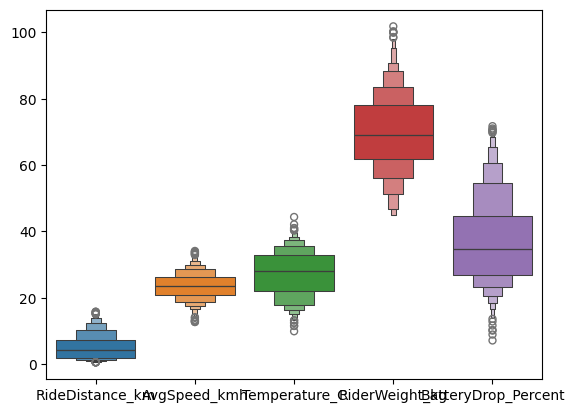

In [22]:
sns.boxenplot(df)
plt.show()